In [815]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

df1 = pd.read_csv('tesla_train.csv', dtype={'end':str})
df2 = pd.read_csv('starbucks_train.csv', dtype={'end':str})
df3 = pd.read_csv('verizon_train.csv', dtype={'end':str})
df = pd.concat([df1, df2, df3])
print len(df1)
print len(df2)
print len(df3)
print len(df)

215
183
216
614


In [816]:
df['y'] = df['y'] / 100
df['delta'] = df['delta'] / 100
df['delta_window'] = df['delta_window'] / 100
tmp = ['c_max_fa','c_max_re','c_max_fo','c_min_fa','c_min_re','c_min_fo','fa_avg','re_avg','fo_avg','c_big_fa','c_big_re','c_big_fo','c_small_fa','c_small_re','c_small_fo','c_max_fa_window','c_max_re_window','c_max_fo_window','c_min_fa_window','c_min_re_window','c_min_fo_window','fa_avg_window','re_avg_window','fo_avg_window','c_big_fa_window','c_big_re_window','c_big_fo_window','c_small_fa_window','c_small_re_window','c_small_fo_window']
for t in tmp:
    df[tmp] = np.log10(df[tmp] + 1)
df = shuffle(df).reset_index(drop=True)
df

,end,y,delta,delta_window,c_max_fa,c_max_re,c_max_fo,c_max,c_w_max,c_min_fa,...,c_big_fa_window,c_big_re_window,c_big_fo_window,c_small_c_window,c_small_fa_window,c_small_re_window,c_small_fo_window,fa_big_c_window,re_big_c_window,fo_big_c_window
0,03011240,0.014,-0.057,-0.085,0.000000e+00,1.253857e-11,3.207739e-11,0.8516,2.089610,0.000000e+00,...,1.064974e-11,1.653050e-11,3.664782e-11,-0.051175,4.783643e-12,0.000000e+00,3.059589e-11,1.231387,1.822808,1.119685
1,03011430,0.088,0.106,0.177,7.493210e-12,0.000000e+00,0.000000e+00,0.9186,0.000000,0.000000e+00,...,8.410189e-12,6.394455e-12,2.870475e-11,-0.088162,5.041408e-12,1.836427e-11,3.082280e-11,0.473160,-0.522409,0.114831
2,03081540,0.241,0.000,0.409,0.000000e+00,2.325755e-11,2.410645e-11,0.8316,2.845452,0.000000e+00,...,2.337289e-11,2.120276e-11,3.426574e-11,-0.263843,0.000000e+00,2.031385e-11,2.924014e-11,4.716981,1.576071,1.650035
3,03081100,0.188,-0.288,-0.043,0.000000e+00,0.000000e+00,2.617783e-11,0.5106,0.000000,0.000000e+00,...,1.137067e-11,0.000000e+00,3.683017e-11,0.035467,3.528088e-12,0.000000e+00,3.683027e-11,1.257856,0.317460,0.540720
4,03071040,-0.095,-0.257,0.298,0.000000e+00,0.000000e+00,2.567175e-11,0.6124,0.000000,0.000000e+00,...,1.629472e-11,2.417849e-11,2.948017e-11,-0.441662,2.045339e-11,2.051896e-11,3.504530e-11,-1.065220,0.084539,-1.475851
5,03081220,-0.153,0.172,-0.292,0.000000e+00,1.889638e-11,2.604205e-11,0.8718,2.361505,0.000000e+00,...,2.123787e-11,2.049726e-11,3.192541e-11,-0.221769,2.073593e-11,2.077537e-11,2.796501e-11,1.739852,0.687058,1.764953
6,03061200,0.338,-0.387,-0.275,0.000000e+00,7.493210e-12,2.534272e-11,0.6369,0.413814,0.000000e+00,...,1.253857e-11,2.092822e-11,2.917216e-11,-0.195929,6.098889e-12,1.649193e-11,2.877322e-11,0.280026,1.210085,1.107522
7,03041450,0.014,0.056,-0.014,2.069601e-11,7.493210e-12,3.161847e-11,0.5719,3.787681,7.493210e-12,...,2.034615e-11,8.480103e-12,3.732487e-11,-0.399075,8.480103e-12,2.797610e-12,3.664772e-11,3.464100,2.746902,1.929364
8,03051440,0.143,-0.018,0.054,7.493210e-12,0.000000e+00,3.254258e-11,0.8126,1.653489,0.000000e+00,...,7.728410e-12,9.951763e-12,3.297103e-11,-0.211172,4.391644e-12,5.152595e-12,3.040438e-11,0.472663,0.591622,0.722820
9,03071320,-0.071,0.053,-0.035,0.000000e+00,2.534272e-11,2.271377e-11,0.8945,3.263186,0.000000e+00,...,1.635663e-11,2.420153e-11,3.204730e-11,-0.146507,2.882761e-12,2.038743e-11,2.944632e-11,1.173164,1.952723,1.255544


In [817]:
# from sklearn.preprocessing import MinMaxScaler

# X = df[['delta','delta_window']].values
# scaler = MinMaxScaler(feature_range=(0, 10))
# X = np.concatenate((X, scaler.fit_transform(df[['c_max_fa','c_max_re','c_max_fo','c_min_fa','c_min_re','c_min_fo','fa_avg','re_avg','fo_avg','c_big_fa','c_big_re','c_big_fo','c_small_fa','c_small_re','c_small_fo','c_max_fa_window','c_max_re_window','c_max_fo_window','c_min_fa_window','c_min_re_window','c_min_fo_window','fa_avg_window','re_avg_window','fo_avg_window','c_big_fa_window','c_big_re_window','c_big_fo_window','c_small_fa_window','c_small_re_window','c_small_fo_window']].values)), axis=1)
# scaler = MinMaxScaler(feature_range=(-10,10))
# X = np.concatenate((X, scaler.fit_transform(df[['c_max', 'c_w_max','c_min', 'c_w_min','c_avg', 'c_w_avg','c_med','c_big_c','c_small_c','fa_big_c','re_big_c','fo_big_c','c_max_window', 'c_w_max_window','c_min_window', 'c_w_min_window','c_avg_window', 'c_w_avg_window','c_med_window','c_big_c_window','c_small_c_window','fa_big_c_window','re_big_c_window','fo_big_c_window']].values)), axis=1)

In [818]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = df.drop(['end'], axis=1).values
# df = scaler.fit_transform(df)

# X = df[:, 1:]
# y = df[:, 0]

In [819]:
df.keys()

Index([u'end', u'y', u'delta', u'delta_window', u'c_max_fa', u'c_max_re',
       u'c_max_fo', u'c_max', u'c_w_max', u'c_min_fa', u'c_min_re',
       u'c_min_fo', u'c_min', u'c_w_min', u'c_avg', u'c_w_avg', u'fa_avg',
       u're_avg', u'fo_avg', u'c_med', u'c_big_c', u'c_big_fa', u'c_big_re',
       u'c_big_fo', u'c_small_c', u'c_small_fa', u'c_small_re', u'c_small_fo',
       u'fa_big_c', u're_big_c', u'fo_big_c', u'c_max_fa_window',
       u'c_max_re_window', u'c_max_fo_window', u'c_max_window',
       u'c_w_max_window', u'c_min_fa_window', u'c_min_re_window',
       u'c_min_fo_window', u'c_min_window', u'c_w_min_window', u'c_avg_window',
       u'c_w_avg_window', u'fa_avg_window', u're_avg_window', u'fo_avg_window',
       u'c_med_window', u'c_big_c_window', u'c_big_fa_window',
       u'c_big_re_window', u'c_big_fo_window', u'c_small_c_window',
       u'c_small_fa_window', u'c_small_re_window', u'c_small_fo_window',
       u'fa_big_c_window', u're_big_c_window', u'fo_big_c_window'],

In [820]:
# X = df.drop(['end', 'y'], axis=1).values
X = df[['delta','delta_window']].values
# X = df[['delta','delta_window','c_max','c_min','c_avg','c_med','c_max_window','c_min_window','c_avg_window','c_med_window']].values
y = df['y'].values

In [821]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# pd.DataFrame(X)

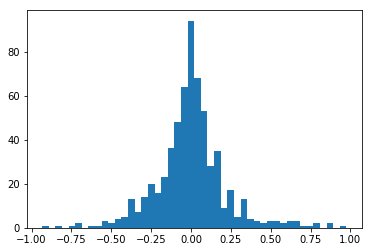

In [190]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.hist(y, bins='auto')
plt.show()

In [439]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression(fit_intercept=False)
k_fold = KFold(n_splits=5)
mses = []
accuracies = []
for k, (train, test) in enumerate(k_fold.split(X, y)):
    regr.fit((X[train]), y[train])
    coef = regr.coef_
    y_pred = regr.predict((X[test]))
    mse = mean_squared_error(y[test], y_pred)
    mses.append(mse)
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(y[test], y_pred)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    accuracies.append(accuracy)
    r2 = r2_score(y[test], y_pred)
    
print('\n5-CV MSE = {0:.4f} Accuracy = {1:.4f}\n'.format(np.mean(mses), np.mean(accuracies)))


5-CV MSE = 0.0572 Accuracy = 0.1074



In [608]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=10.0)
k_fold = KFold(n_splits=5)
mses = []
accuracies = []
for k, (train, test) in enumerate(k_fold.split(X, y)):
    svr.fit((X[train]), y[train])
    y_pred = svr.predict((X[test]))
    mse = mean_squared_error(y[test], y_pred)
    mses.append(mse)
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(y[test], y_pred)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    accuracies.append(accuracy)
    r2 = r2_score(y[test], y_pred)
    
print('\n5-CV MSE = {0:.4f} Accuracy = {1:.4f}\n'.format(np.mean(mses), np.mean(accuracies)))


5-CV MSE = 0.0559 Accuracy = 0.0832



In [701]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(20,20),max_iter=500, learning_rate='adaptive', learning_rate_init=0.001, alpha=0.0001, solver='adam') # 20 20 0.3486
k_fold = KFold(n_splits=5)
mses = []
accuracies = []
for k, (train, test) in enumerate(k_fold.split(X, y)):
    mlp.fit(X[train], y[train])
    y_pred = mlp.predict(X[test])
    mse = mean_squared_error(y[test], y_pred)
    mses.append(mse)
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(y[test], y_pred)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    accuracies.append(accuracy)
    r2 = r2_score(y[test], y_pred)
    
print('\n5-CV MSE = {0:.4f} Accuracy = {1:.4f}\n'.format(np.mean(mses), np.mean(accuracies)))


5-CV MSE = 0.0942 Accuracy = 0.3092



In [822]:
import xgboost as xgb

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(labels, preds)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    return 'my-error', 1 - accuracy

param = {}
param['objective'] = 'reg:linear'
param['verbosity'] = 0
param['eta'] = 0.01
param['max_depth'] = 2
param['min_child_weight'] = 4
param['subsample'] = 0.6
param['colsample_bytree'] = 0.6

k_fold = KFold(n_splits=5)
mses = []
accuracies = []
for k, (train, test) in enumerate(k_fold.split(X, y)):
    train_X = X[train]
    train_Y = y[train]
    test_X = X[test]
    test_Y = y[test]
    xg_train = xgb.DMatrix(train_X, label=train_Y)
    xg_test = xgb.DMatrix(test_X, label=test_Y)
    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    num_round = 50
    bst = xgb.train(param, xg_train, num_round, watchlist, feval=evalerror)
    y_pred = bst.predict(xg_test)
    mse = mean_squared_error(y[test], y_pred)
    mses.append(mse)
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(y[test], y_pred)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    accuracies.append(accuracy)
    r2 = r2_score(y[test], y_pred)
    
print('\n5-CV MSE = {0:.4f} Accuracy = {1:.4f}\n'.format(np.mean(mses), np.mean(accuracies)))

[16:43:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[0]	train-rmse:0.546741	test-rmse:0.52575	train-my-error:0.542373	test-my-error:0.431373
[16:43:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1]	train-rmse:0.542181	test-rmse:0.521158	train-my-error:0.542373	test-my-error:0.431373
[16:43:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[2]	train-rmse:0.537692	test-rmse:0.516675	train-my-error:0.542373	test-my-error:0.431373
[16:43:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[3]	train-rmse:0.533254	test-rmse:0.512198	train-my-error:0.542373	test-my-error:0.431373
[16:43:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[4]	train-rmse:0.528726	test-rmse:0.507631	train-my-error:0.542373	test-my-error:0.431

[16:43:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[41]	train-rmse:0.398357	test-rmse:0.376936	train-my-error:0.542373	test-my-error:0.431373
[16:43:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[42]	train-rmse:0.395477	test-rmse:0.374078	train-my-error:0.542373	test-my-error:0.431373
[16:43:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[43]	train-rmse:0.392875	test-rmse:0.371501	train-my-error:0.542373	test-my-error:0.431373
[16:43:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[44]	train-rmse:0.390161	test-rmse:0.368814	train-my-error:0.542373	test-my-error:0.431373
[16:43:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[45]	train-rmse:0.387464	test-rmse:0.36611	train-my-error:0.542373	test-my-error:

[16:43:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[32]	train-rmse:0.42397	test-rmse:0.412247	train-my-error:0.533632	test-my-error:0.484375
[16:43:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[33]	train-rmse:0.420866	test-rmse:0.409068	train-my-error:0.533632	test-my-error:0.484375
[16:43:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[34]	train-rmse:0.417764	test-rmse:0.4059	train-my-error:0.533632	test-my-error:0.484375
[16:43:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[35]	train-rmse:0.414765	test-rmse:0.402903	train-my-error:0.533632	test-my-error:0.484375
[16:43:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[36]	train-rmse:0.411765	test-rmse:0.399963	train-my-error:0.533632	test-my-error:0.

[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23]	train-rmse:0.448871	test-rmse:0.463218	train-my-error:0.524444	test-my-error:0.516129
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[24]	train-rmse:0.445487	test-rmse:0.460031	train-my-error:0.524444	test-my-error:0.516129
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[25]	train-rmse:0.441911	test-rmse:0.456544	train-my-error:0.524444	test-my-error:0.516129
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[26]	train-rmse:0.43846	test-rmse:0.453418	train-my-error:0.524444	test-my-error:0.516129
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[27]	train-rmse:0.435145	test-rmse:0.450215	train-my-error:0.524444	test-my-error:

[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14]	train-rmse:0.478103	test-rmse:0.511953	train-my-error:0.495575	test-my-error:0.622951
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[15]	train-rmse:0.474353	test-rmse:0.50829	train-my-error:0.495575	test-my-error:0.622951
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16]	train-rmse:0.470597	test-rmse:0.504601	train-my-error:0.495575	test-my-error:0.622951
[16:43:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[17]	train-rmse:0.466963	test-rmse:0.500995	train-my-error:0.495575	test-my-error:0.622951
[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18]	train-rmse:0.463394	test-rmse:0.497438	train-my-error:0.495575	test-my-error:

[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	train-rmse:0.523162	test-rmse:0.509556	train-my-error:0.516807	test-my-error:0.55102
[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[6]	train-rmse:0.518929	test-rmse:0.505262	train-my-error:0.516807	test-my-error:0.55102
[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[7]	train-rmse:0.514604	test-rmse:0.50084	train-my-error:0.516807	test-my-error:0.55102
[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8]	train-rmse:0.510505	test-rmse:0.496656	train-my-error:0.516807	test-my-error:0.55102
[16:43:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[9]	train-rmse:0.50649	test-rmse:0.492643	train-my-error:0.516807	test-my-error:0.55102
[1

[16:43:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[46]	train-rmse:0.386129	test-rmse:0.369151	train-my-error:0.516807	test-my-error:0.55102
[16:43:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[47]	train-rmse:0.383649	test-rmse:0.366621	train-my-error:0.516807	test-my-error:0.55102
[16:43:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[48]	train-rmse:0.381304	test-rmse:0.364214	train-my-error:0.516807	test-my-error:0.55102
[16:43:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[49]	train-rmse:0.378734	test-rmse:0.361557	train-my-error:0.516807	test-my-error:0.55102

5-CV MSE = 0.1412 Accuracy = 0.4788



In [ ]:
# XGB Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from xgboost import XGBRegressor
import pickle

def my_accuracy_func(y_true, y_pred):
    accuracy, count = 0, 0
    for i, (a, b) in enumerate(zip(y_true, y_pred)):
        if a > 0.1 and b > 0.1: accuracy += 1
        if a < -0.1 and b < -0.1: accuracy += 1
        if a > 0.1 or a < -0.1: count += 1
    accuracy = accuracy * 1.0 / count
    return accuracy

my_scorer = make_scorer(my_accuracy_func, greater_is_better=True)

params = {'learning_rate':[x * 0.01 for x in range(1,5)], 'min_child_weight':[4], 'gamma':[i/10 for i in range(5,40)],  'subsample':[0.6],
'colsample_bytree':[0.6], 'max_depth': [2,3,4]}

xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params, cv=5, scoring=my_scorer)
grid.fit(X, y)

In [ ]:
print grid.best_score_
print grid.best_params_
pd.DataFrame(grid.cv_results_)